**<font color=blue>Vamos a desarrollar un script para hacer Análisis de Componentes Principales (PCA) sobre los espectros de masas FTICRMS de crudos y fondos de vacío, los datos de masa fueron procesados con el software PetrOrg y extraídos las formulas moleculares para cada tipo de muestras. El número de muestras es de 40, 22 crudos y 18 fondos de vacío.**

In [1]:
#Cargamos las librerias que vamos a requeririr para hacer el desarrollo
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_score
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
%matplotlib inline
# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
Y = pd.DataFrame(['CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR',
                  'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR',
                  'CR', 'CR', 'VR', 'VR', 'VR', 'VR', 'VR', 'VR', 'VR', 'VR',
                  'VR', 'VR', 'VR', 'VR', 'VR', 'VR', 'VR', 'VR', 'VR',
                  'VR', 'VR'])
Y1=Y.set_axis(['Crude_Oil'], axis=1, inplace=False)

y = ['CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR',
                  'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR', 'CR',
                  'CR', 'CR', 'VR', 'VR', 'VR', 'VR', 'VR', 'VR', 'VR', 'VR',
                  'VR', 'VR', 'VR', 'VR', 'VR', 'VR', 'VR', 'VR', 'VR',
                  'VR', 'VR']
y1 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
                  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [113]:
data = pd.read_excel('Supplementary_CCR.xlsx')#, sheet_name='Sheet1', header=0, index_col=0)
data = data.drop(['Molecules\Samples'], axis=1)
val=data.values
NM=len(data.columns) # Número de muestras
suma = np.empty((NM, 1)) #creamos un vector vacío para luego ir llenandolo con el resultado de la suma de intesidades de cada espectro
k=0 #inicializamos el contador
for k in np.arange(NM): #lo ponemos a correr hasta 40, que es el numero de espectros(muestras)
    suma[k]=sum(val[:, k]) #desarrollamos la suma a lo largo de cada columna, cada muestra
    k +=1 #variamos el contador en 1
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
valt=val.T
valtn=valt/suma


# Iniciamos el desarrollo del PCA en este caso con 9 componentes
pca=PCA(n_components=2) # Otra opción es hacer pca hasta obtener un mínimo explicado ej.: pca=PCA(.85)
pca.fit(valtn) # obtener los componentes principales
datos_pca=pca.transform(valtn) # convertimos nuestros datos con las nuevas dimensiones de PCA

X_tr1, X_te1, y_tr1, y_te1 = train_test_split(datos_pca, y1, train_size   = 0.7, random_state = 1234,
                                                    shuffle = True)
X_tr2, X_te2, y_tr2, y_te2 = train_test_split(valtn, y1, train_size   = 0.7, random_state = 1234,
                                                    shuffle = True)

# Creación del modelo SVM lineal
# ==============================================================================
modelo1 = SVC(C = 60, kernel = 'linear', random_state=123)
modelo1.fit(X_tr1, y_tr1)
modelo2 = SVC(C = 40, kernel = 'linear', random_state=123)
modelo2.fit(X_tr2, y_tr2)


SVC(C=40, kernel='linear', random_state=123)

In [67]:
# Predicciones test
# ==============================================================================
predicciones1 = modelo1.predict(X_te1)
predicciones1

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1])

In [68]:
# Accuracy de test del modelo 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_te1,
            y_pred    = predicciones1,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 100.0%


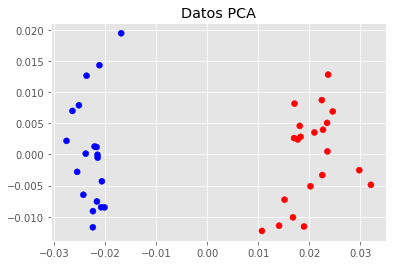

In [69]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(datos_pca[:, 0], datos_pca[:, 1], c=y1);
ax.set_title("Datos PCA");

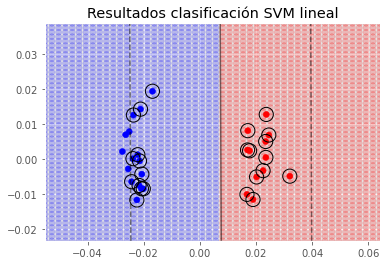

In [71]:
# Representación gráfica de los límites de clasificación
# ==============================================================================
# Grid de valores
x = np.linspace(np.min(X_tr1[:,0]*2), np.max(X_tr1[:,0]*2), 50)
y = np.linspace(np.min(X_tr1[:,1]*2), np.max(X_tr1[:,1]*2), 50)
Y, X = np.meshgrid(y, x)
grid = np.vstack([X.ravel(), Y.ravel()]).T

# Predicción valores grid
pred_grid = modelo1.predict(grid)

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha = 0.2)
ax.scatter(X_tr1[:,0], X_tr1[:,1], c=y_tr1, alpha = 1)

# Vectores soporte
ax.scatter(
    modelo1.support_vectors_[:, 0],
    modelo1.support_vectors_[:, 1],
    s=200, linewidth=1,
    facecolors='none', edgecolors='black'
)

# Hiperplano de separación
ax.contour(
    X,
    Y,
    modelo1.decision_function(grid).reshape(X.shape),
    colors = 'k',
    levels = [-1, 0, 1],
    alpha  = 0.5,
    linestyles = ['--', '-', '--']
)
#ax.set_xlim(-0.04, 0.04)
#ax.set_ylim(-0.04, 0.04)
ax.set_title("Resultados clasificación SVM lineal");

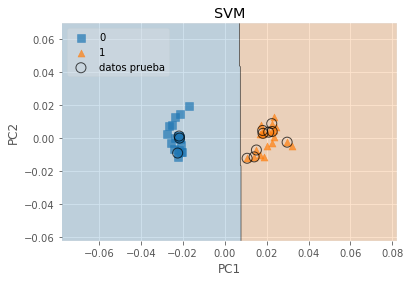

In [72]:
# Representación gráfica utilizando plot_decision_regions() de mlxtend
# ==============================================================================
# 
# Specify keyword arguments to be passed to underlying plotting functions
scatter_kwargs = {'s': 50, 'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'s': 100, 'label': 'datos prueba', 'alpha': 0.7}

#plot_decision_regions(X_train, y_train, clf=modelo, legend=2, zoom_factor=20.)

plot_decision_regions(datos_pca, y1, clf=modelo1, legend=2, zoom_factor=20.,
                      X_highlight=X_test,
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)

# Adding axes annotations
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('SVM')
plt.show()

In [64]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    predicciones,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,3,0
1,0,9


In [65]:
#print(confusion_matrix(predicciones, y_test))
print(classification_report(y_test, predicciones, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000         3
           1      1.000     1.000     1.000         9

    accuracy                          1.000        12
   macro avg      1.000     1.000     1.000        12
weighted avg      1.000     1.000     1.000        12



In [107]:
X_SVC=modelo2.support_vectors_[:]
#X_SVC = modelo2.support_[:]
#modelo1.support_vectors_[:, 1]

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00024552, 0.00075843, 0.00135997, ..., 0.        , 0.        ,
        0.        ],
       [0.00128682, 0.00206184, 0.00293149, ..., 0.        , 0.        ,
        0.        ],
       [0.00015375, 0.0007183 , 0.00252587, ..., 0.        , 0.        ,
        0.        ]])

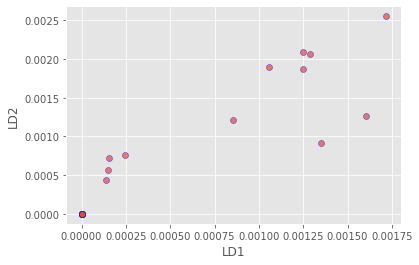

In [110]:
pred_grid = modelo2.predict(valtn)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_SVC[:,0],
    X_SVC[:,1],
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b')

In [105]:
modelo2.decision_function(valtn)

array([-0.97665599, -0.97804588, -0.97069146, -0.97564747, -0.98193598,
       -0.97829036, -0.97791851, -0.97967412, -0.97808804, -0.97857313,
       -0.97862389, -0.9751941 , -0.97505608, -0.97222514, -0.97984957,
       -0.97478819, -0.97652017, -0.9758585 , -0.97759553, -0.97488496,
       -0.97570692, -0.99863149, -0.99855052, -1.00049377, -0.99931174,
       -0.99878028, -0.99817918, -1.00086667, -0.99788644, -1.0013094 ,
       -0.99886572, -0.99881054, -0.9997326 , -1.0002674 , -0.99615834,
       -0.99917369, -0.99831276, -0.99970829, -0.99807846, -0.99865364])

In [111]:
modelo2.predict(X_te2)

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1])

In [112]:
modelo2.score(X_te2, y_te2)

1.0